In [43]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [45]:
#reading online finance data from google finance or yahoo finance
import pandas_datareader.data as web

In [46]:
from datetime import datetime

In [47]:
tech_list = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

In [48]:
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

In [49]:
#globals() is setting all the string names as dataframe names
for stock in tech_list:
    globals()[stock] = web.DataReader(stock, 'yahoo', start, end)

In [50]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-16,55.032501,54.389999,54.432499,54.974998,84632400.0,54.434902
2019-09-17,55.205002,54.779999,54.990002,55.174999,73274800.0,54.632942
2019-09-18,55.712502,54.860001,55.264999,55.692501,101360000.0,55.145359
2019-09-19,55.939999,55.092499,55.502499,55.240002,88242400.0,54.697304
2019-09-20,55.639999,54.367500,55.345001,54.432499,221652400.0,53.897728


In [51]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,79.842854,77.762480,78.771289,78.890443,1.407263e+08,78.566551
std,18.978308,18.168059,18.759412,18.556084,6.282190e+07,18.704056
min,54.959999,53.152500,54.432499,54.419998,4.661760e+07,53.885353
25%,66.276251,65.179998,65.654999,65.628126,9.766750e+07,65.238235
50%,75.721249,73.706249,74.302502,74.826248,1.260758e+08,74.401604
75%,88.609999,86.463749,87.848125,87.923752,1.665758e+08,87.765511
max,137.979996,130.529999,137.589996,134.179993,4.016932e+08,134.179993


In [52]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-09-16 to 2020-09-16
Data columns (total 6 columns):
High         254 non-null float64
Low          254 non-null float64
Open         254 non-null float64
Close        254 non-null float64
Volume       254 non-null float64
Adj Close    254 non-null float64
dtypes: float64(6)
memory usage: 13.9 KB


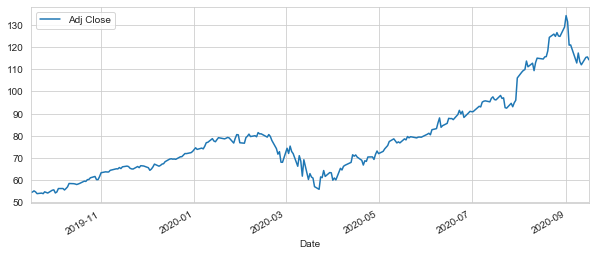

In [53]:
AAPL['Adj Close'].plot(legend = True, figsize = (10,4))

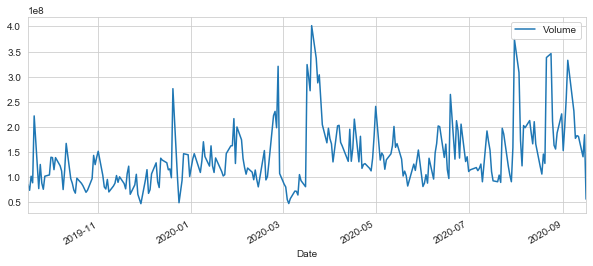

In [54]:
AAPL['Volume'].plot(legend = True, figsize = (10,4))

In [55]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

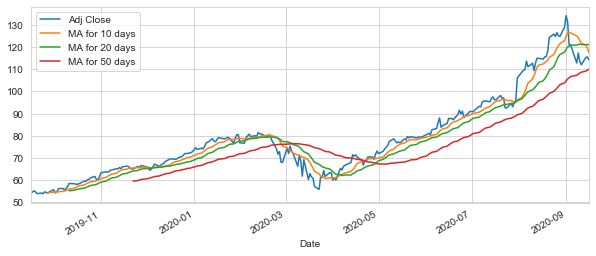

In [56]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days','MA for 50 days']].plot(figsize = (10,4))

In [57]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

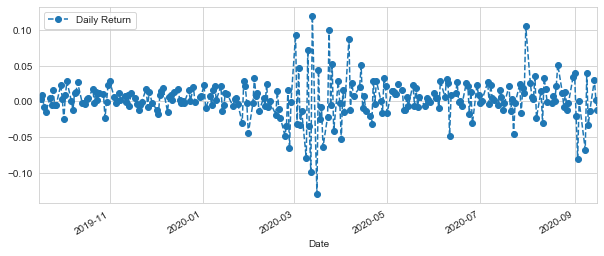

In [58]:
AAPL['Daily Return'].plot(figsize = (10,4), legend = True, linestyle = '--', marker = 'o')

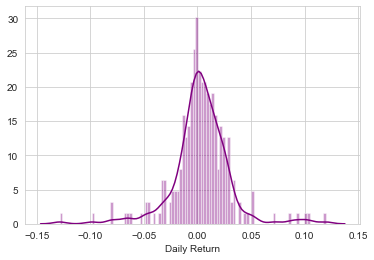

In [59]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'purple')

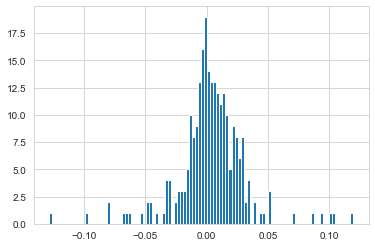

In [60]:
AAPL['Daily Return'].hist(bins = 100)

In [61]:
# taking adj close column from all the dataset
closing_df = web.DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [62]:
closing_df.head()

Symbols,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2019-09-16,54.434902,1231.630005,134.795425,1807.839966
2019-09-17,54.632942,1229.880005,135.843506,1822.550049
2019-09-18,55.145359,1232.650024,136.960770,1817.459961
2019-09-19,54.697304,1238.750000,139.482071,1821.500000
2019-09-20,53.897728,1229.839966,137.870407,1794.160034


In [63]:
tech_rets = closing_df.pct_change()

In [64]:
tech_rets.head()

Symbols,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2019-09-16,NaN,NaN,NaN,NaN
2019-09-17,0.003638,-0.001421,0.007775,0.008137
2019-09-18,0.009379,0.002252,0.008225,-0.002793
2019-09-19,-0.008125,0.004949,0.018409,0.002223
2019-09-20,-0.014618,-0.007193,-0.011555,-0.015010


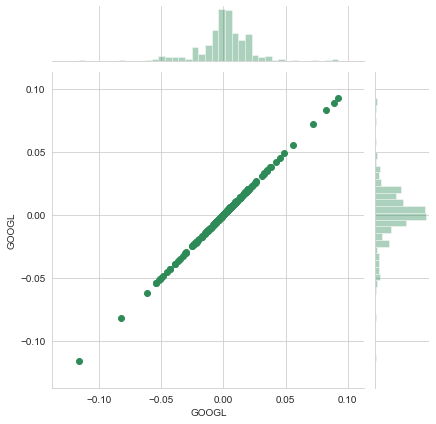

In [65]:
sns.jointplot('GOOGL', 'GOOGL', tech_rets, kind = 'scatter', color = 'seagreen')

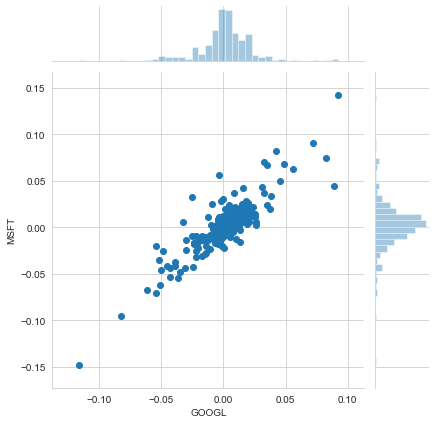

In [66]:
sns.jointplot('GOOGL', 'MSFT', tech_rets, kind = 'scatter')

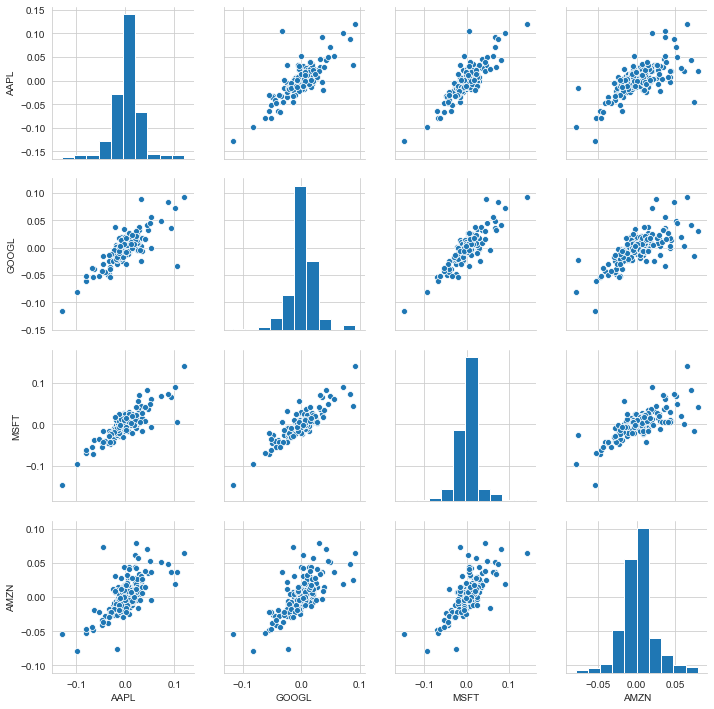

In [67]:
sns.pairplot(tech_rets.dropna())

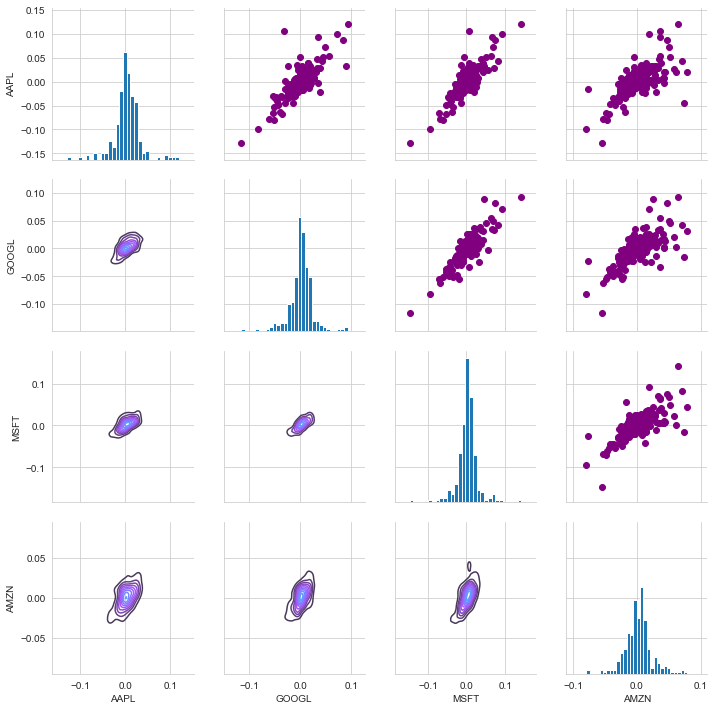

In [68]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color = 'purple')
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
returns_fig.map_diag(plt.hist, bins = 30)

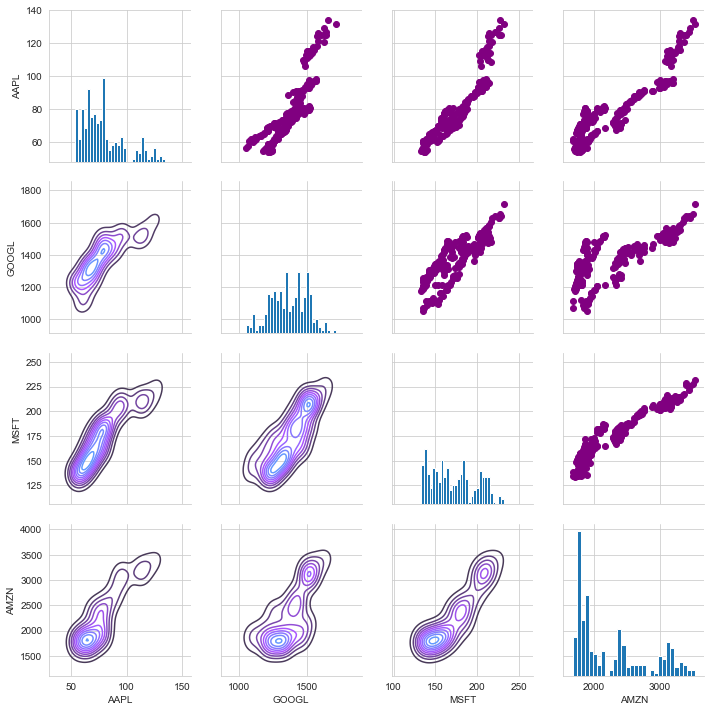

In [69]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter, color = 'purple')
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
returns_fig.map_diag(plt.hist, bins = 30)

In [70]:
corr = tech_rets.dropna().corr()


In [71]:
mask = np.zeros_like(corr)

In [72]:
mask

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [73]:
mask[np.triu_indices_from(mask)] = True

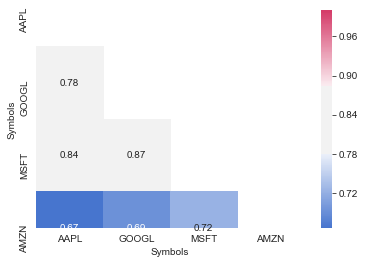

In [74]:
sns.heatmap(corr, cmap = sns.diverging_palette(256, 0, sep = 80, n = 7, as_cmap = True), annot = True, mask = mask)

In [75]:
rets = tech_rets.dropna()

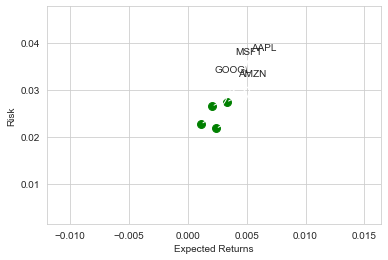

In [76]:
area = np.pi*20

plt.scatter(rets.mean(), rets.std(), s = area, color = 'green')

plt.xlabel('Expected Returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

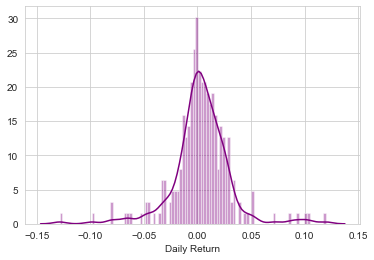

In [77]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'purple')

In [78]:
rets['AAPL'].quantile(0.05)

-0.03739927877943003

In [79]:
1000000*0.034

34000.0

In [80]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOGL']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOGL']

In [81]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [82]:
GOOGL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-16,1239.020020,1225.189941,1230.439941,1231.630005,1410900,1231.630005
2019-09-17,1235.000000,1223.349976,1231.630005,1229.880005,1040300,1229.880005
2019-09-18,1236.239990,1216.469971,1230.239990,1232.650024,872000,1232.650024
2019-09-19,1244.339966,1232.310059,1232.319946,1238.750000,827700,1238.750000
2019-09-20,1242.800049,1223.579956,1233.640015,1229.839966,1884600,1229.839966


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

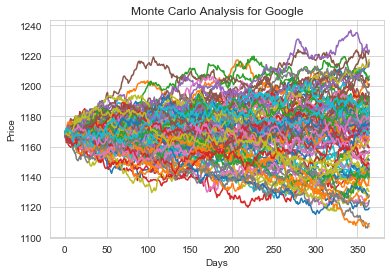

In [83]:
start_price = 1168.430054

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [84]:
runs = 1000

simulations = np.zeros(runs)

np.set_printoptions(threshold=5)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

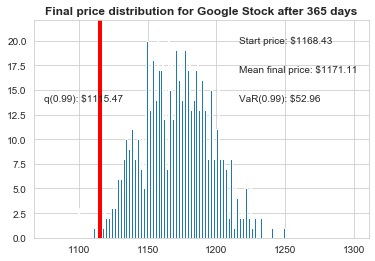

In [85]:
q = np.percentile(simulations, 1)

plt.hist(simulations, bins = 200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');